In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
from nrclex import NRCLex
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/evaluation_volunteer_text_1000.csv')

In [3]:
df.head()

,Unnamed: 0,text
0,0,u still there
1,1,call my #
2,2,"Really, you are better than this (calling thes..."
3,3,We're a bunch of guys working to reduce demand...
4,4,"lots of danger, including jail"


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,text
0,u still there
1,call my #
2,"Really, you are better than this (calling thes..."
3,We're a bunch of guys working to reduce demand...
4,"lots of danger, including jail"


In [6]:
text_object = NRCLex('Why does this not work?. I thought that it was supposed to tell me stuff. Gosh this sucks. But sometimes it still makes me happy')

In [7]:
text_object.top_emotions

[('anticipation', 0.4)]

In [9]:
emotions_tracked = {'anger': [], 'sadness': [], 'fear': [], 'joy': [], 'disgust': [], 'surprise': [], 'trust': [], 'neutral': []}
no_emotions = 0
for idx in range(len(df)):
    text_object = NRCLex(df.text[idx])
    if len(text_object.affect_list) == 0:
        no_emotions += 1
        emotions_tracked['neutral'].append(1)
    else:
        emotions = text_object.affect_list
        for emotion in emotions:
            if emotion in emotions_tracked:
                emotions_tracked[emotion].append(text_object.raw_emotion_scores[emotion])

In [10]:
total_emotions = []
for emotion in emotions_tracked:
    total_emotions.append(np.sum(emotions_tracked[emotion]))

In [11]:
print(total_emotions)

[1317, 373, 981, 494, 579, 128, 1051, 562]


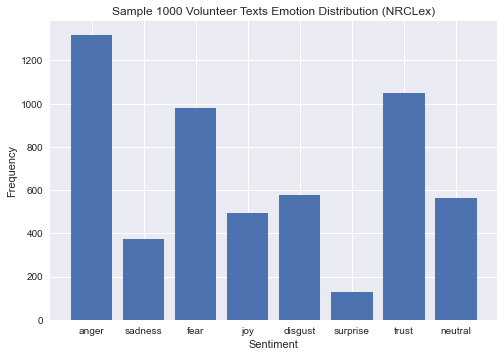

In [14]:
x_axis = list(emotions_tracked.keys())
plt.bar(x_axis, total_emotions)
plt.title(f'Sample {len(df)} Volunteer Texts Emotion Distribution (NRCLex)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.savefig('nrclex_sentiment.jpg')